# Preparar Datos

## Importar Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

Los datos principales utilizados para el análisis de portafolios de media-varianza son estimaciones del retorno y el riesgo de los activos involucrados. Suponiendo que los retornos en exceso de los activos se distribuyen de manera normal, necesitamos estimar los parámetros de la distribución subyacente.

Usaremos los datos de RiskAmerica

In [2]:
df_ts = pd.read_excel('IndicesHistoricosValor.xlsx')
df_ts['Fecha'] = pd.to_datetime(df_ts['Fecha'])
df_ts = df_ts.sort_values(by='Fecha', ascending=True)
df_ts.set_index('Fecha', inplace=True)
df_ts.head()

CALICHERAA Cierre Ix  BSANTANDER Cierre Ix  SECURITY Cierre Ix  \
Fecha                                                                        
2019-10-18             8484.6887            12526.3358          10166.4637   
2019-10-21             8484.6887            12014.5595           9647.8553   
2019-10-22             8484.6887            12214.3960           9693.8571   
2019-10-23             8484.6887            11987.7521           9684.5760   
2019-10-24             8484.6887            12155.9072           9761.2456   

            CHILE Cierre Ix  WATTS Cierre Ix  ANTARCHILE Cierre Ix  \
Fecha                                                                
2019-10-18        9631.0626        8807.5976             6163.7233   
2019-10-21        9285.0196        8807.5976             5839.4523   
2019-10-22        9375.9848        8807.5976             5846.4177   
2019-10-23        9295.3352        8807.5976             5581.8071   
2019-10-24        9330.9711        8807.5976             5691.6640   

            CENCOMALLS Cierre Ix  CCU Cierre Ix  CAP Cierre Ix  \
Fecha                                                            
2019-10-18             1238.4217      4134.5296     10781.8894   
2019-10-21             1163.3894      4066.4930     10011.9133   
2019-10-22             1128.7193      4029.8579     10217.2859   
2019-10-23             1138.2277      4003.6900     10099.1967   
2019-10-24             1148.1242      4100.5113     10379.8725   

            VAPORES Cierre Ix  
Fecha                          
2019-10-18           413.9732  
2019-10-21           398.7300  
2019-10-22           402.7414  
2019-10-23           404.9877  
2019-10-24           408.1968

In [3]:
# Obtener el primer día hábil de cada mes
df_ts = df_ts.resample('BMS').first()

# Mostrar los primeros resultados
df_ts.head()

CALICHERAA Cierre Ix  BSANTANDER Cierre Ix  SECURITY Cierre Ix  \
Fecha                                                                        
2019-10-01             8484.6887            12526.3358          10166.4637   
2019-11-01             8484.6887            11497.9091           8675.7660   
2019-12-02             8484.6887            10284.2680           7610.4627   
2020-01-01             6622.1526            10842.3479           7989.7752   
2020-02-03             6622.1526             9960.1429           7267.4673   

            CHILE Cierre Ix  WATTS Cierre Ix  ANTARCHILE Cierre Ix  \
Fecha                                                                
2019-10-01        9631.0626        8807.5976             6163.7233   
2019-11-01        8984.9280        8599.9323             5299.7829   
2019-12-02        7522.9196        8003.0357             4951.5115   
2020-01-01        7907.4119        7837.9539             5565.4535   
2020-02-03        7521.9818        7673.4376             5532.3677   

            CENCOMALLS Cierre Ix  CCU Cierre Ix  CAP Cierre Ix  \
Fecha                                                            
2019-10-01             1238.4217      4134.5296     10781.8894   
2019-11-01             1112.5485      3857.1497      9720.9688   
2019-12-02              899.0944      3887.5045      8960.2346   
2020-01-01             1094.5666      3878.2183      9772.3120   
2020-02-03             1046.7658      3754.0730      7923.9588   

            VAPORES Cierre Ix  
Fecha                          
2019-10-01           413.9732  
2019-11-01           400.6555  
2019-12-02           418.1450  
2020-01-01           436.7578  
2020-02-03           397.1255

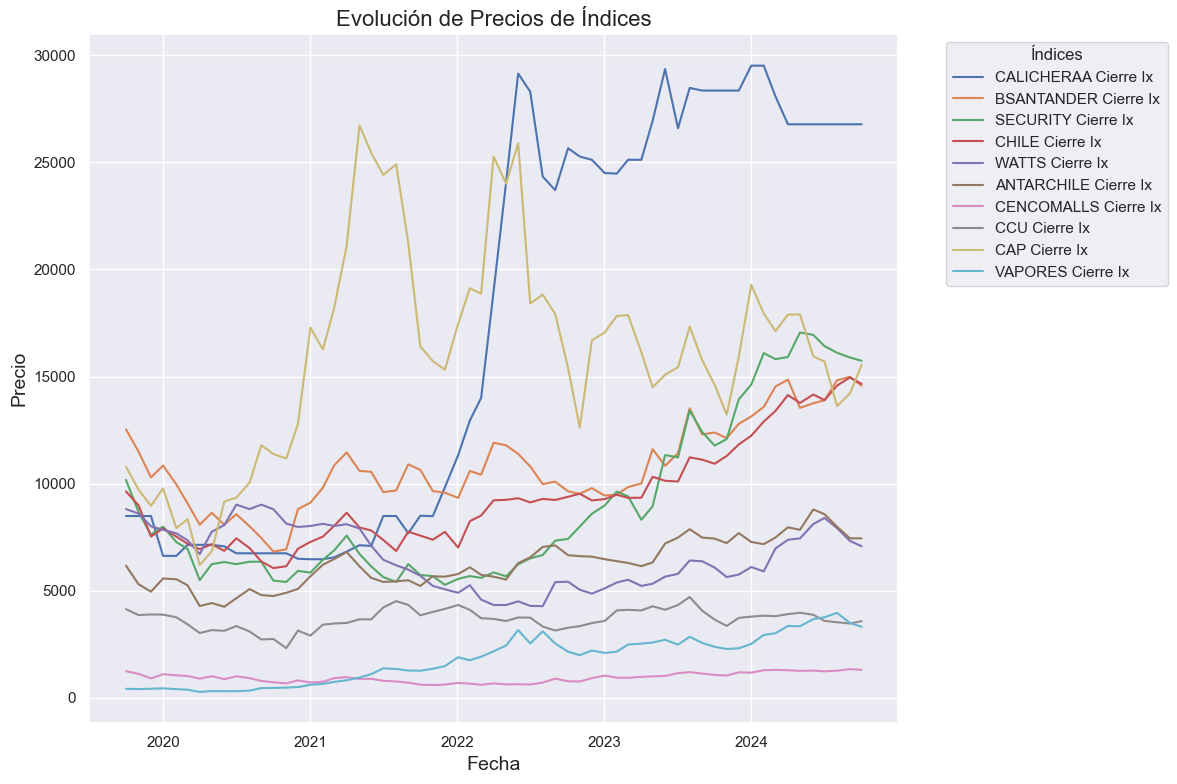

In [4]:
# Graficar la evolución de precios para todos los índices
plt.figure(figsize=(12, 8))

# Graficar todas las columnas (activos)
for column in df_ts.columns:
    plt.plot(df_ts.index, df_ts[column], label=column)

# Añadir título y etiquetas
plt.title('Evolución de Precios de Índices', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True)
plt.legend(title='Índices', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

A continuación, convertimos los precios de cierre absolutos en cambios relativos ("rendimientos excedentes"), en unidades de porcentaje. Utilizamos la función pct_change de Pandas para calcular todos los ratios en una sola pasada, lo que da como resultado una fila inicial que contiene NaN, la cual limpiamos simplemente eliminándola. Dependiendo del contexto, puede ser más significativo usar rendimientos log-normales en lugar de los rendimientos utilizados en este laboratorio.

In [5]:
df_r = df_ts.pct_change().iloc[1:] * 100
df_r.head()

CALICHERAA Cierre Ix  BSANTANDER Cierre Ix  SECURITY Cierre Ix  \
Fecha                                                                        
2019-11-01              0.000000             -8.210116          -14.662893   
2019-12-02              0.000000            -10.555320          -12.279069   
2020-01-01            -21.951732              5.426540            4.984092   
2020-02-03              0.000000             -8.136660           -9.040403   
2020-03-02              7.805089             -8.930755           -4.503054   

            CHILE Cierre Ix  WATTS Cierre Ix  ANTARCHILE Cierre Ix  \
Fecha                                                                
2019-11-01        -6.708861        -2.357797            -14.016534   
2019-12-02       -16.271788        -6.940713             -6.571428   
2020-01-01         5.110945        -2.062740             12.399083   
2020-02-03        -4.874289        -2.098970             -0.594485   
2020-03-02        -4.388480        -4.214229             -5.174349   

            CENCOMALLS Cierre Ix  CCU Cierre Ix  CAP Cierre Ix  \
Fecha                                                            
2019-11-01            -10.164001      -6.708862      -9.839839   
2019-12-02            -19.186049       0.786975      -7.825704   
2020-01-01             21.741010      -0.238873       9.063127   
2020-02-03             -4.367098      -3.201091     -18.914185   
2020-03-02             -3.503668      -8.734966       5.161987   

            VAPORES Cierre Ix  
Fecha                          
2019-11-01          -3.217044  
2019-12-02           4.365221  
2020-01-01           4.451279  
2020-02-03          -9.074205  
2020-03-02          -6.262630

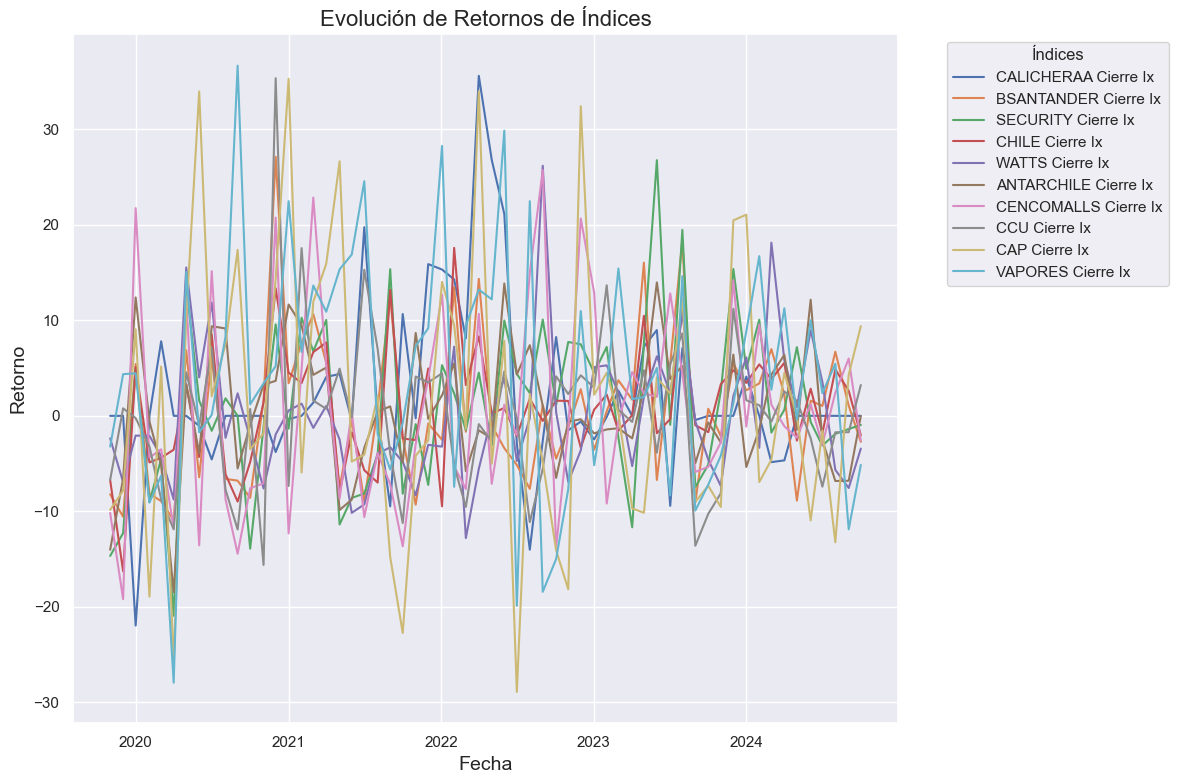

In [6]:
# Graficar la evolución de precios para todos los índices
plt.figure(figsize=(12, 8))

# Graficar todas las columnas (activos)
for column in df_r.columns:
    plt.plot(df_r.index, df_r[column], label=column)

# Añadir título y etiquetas
plt.title('Evolución de Retornos de Índices', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Retorno', fontsize=14)
plt.grid(True)
plt.legend(title='Índices', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Calcular la media y la matriz de varianza-covarianza

Con los datos de series temporales de las acciones disponibles, utilizamos las funciones mean y cov de Pandas para calcular los rendimientos promedio y su matriz de varianza-covarianza.

In [7]:
mu = df_r.mean()
sigma = df_r.cov()

In [8]:
mu

CALICHERAA Cierre Ix    2.300068
BSANTANDER Cierre Ix    0.542979
SECURITY Cierre Ix      1.104528
CHILE Cierre Ix         0.882666
WATTS Cierre Ix        -0.131743
ANTARCHILE Cierre Ix    0.532796
CENCOMALLS Cierre Ix    0.603927
CCU Cierre Ix           0.087283
CAP Cierre Ix           1.587086
VAPORES Cierre Ix       4.259496
dtype: float64

In [9]:
sigma

CALICHERAA Cierre Ix  BSANTANDER Cierre Ix  \
CALICHERAA Cierre Ix             79.839173              0.707598   
BSANTANDER Cierre Ix              0.707598             61.610397   
SECURITY Cierre Ix               -1.077481             33.827181   
CHILE Cierre Ix                   0.375254             38.851272   
WATTS Cierre Ix                  -7.512107             15.561374   
ANTARCHILE Cierre Ix             -7.519051             17.566463   
CENCOMALLS Cierre Ix            -19.311658             41.835000   
CCU Cierre Ix                     3.049005             29.476037   
CAP Cierre Ix                    19.334123             28.507659   
VAPORES Cierre Ix                30.667093              9.938254   

                      SECURITY Cierre Ix  CHILE Cierre Ix  WATTS Cierre Ix  \
CALICHERAA Cierre Ix           -1.077481         0.375254        -7.512107   
BSANTANDER Cierre Ix           33.827181        38.851272        15.561374   
SECURITY Cierre Ix             76.797304        26.294170        25.798500   
CHILE Cierre Ix                26.294170        37.108160        11.407049   
WATTS Cierre Ix                25.798500        11.407049        49.797951   
ANTARCHILE Cierre Ix           34.681686        15.324477        18.305777   
CENCOMALLS Cierre Ix           44.399146        25.857240        24.582770   
CCU Cierre Ix                  23.908262        12.057693         7.215306   
CAP Cierre Ix                  38.671525         8.777379        19.621447   
VAPORES Cierre Ix              20.145909        -2.944483         0.184080   

                      ANTARCHILE Cierre Ix  CENCOMALLS Cierre Ix  \
CALICHERAA Cierre Ix             -7.519051            -19.311658   
BSANTANDER Cierre Ix             17.566463             41.835000   
SECURITY Cierre Ix               34.681686             44.399146   
CHILE Cierre Ix                  15.324477             25.857240   
WATTS Cierre Ix                  18.305777             24.582770   
ANTARCHILE Cierre Ix             44.223760             28.409605   
CENCOMALLS Cierre Ix             28.409605            109.968057   
CCU Cierre Ix                    12.954097             31.833894   
CAP Cierre Ix                    21.844522             38.530941   
VAPORES Cierre Ix                23.747134             10.923900   

                      CCU Cierre Ix  CAP Cierre Ix  VAPORES Cierre Ix  
CALICHERAA Cierre Ix       3.049005      19.334123          30.667093  
BSANTANDER Cierre Ix      29.476037      28.507659           9.938254  
SECURITY Cierre Ix        23.908262      38.671525          20.145909  
CHILE Cierre Ix           12.057693       8.777379          -2.944483  
WATTS Cierre Ix            7.215306      19.621447           0.184080  
ANTARCHILE Cierre Ix      12.954097      21.844522          23.747134  
CENCOMALLS Cierre Ix      31.833894      38.530941          10.923900  
CCU Cierre Ix             70.422580      26.335453          16.908192  
CAP Cierre Ix             26.335453     205.275071          88.904473  
VAPORES Cierre Ix         16.908192      88.904473         153.408441

Para uso futuro, guardamos los datos como archivos pickle de Python.

In [10]:
mu.to_pickle("mu.pkl")
sigma.to_pickle("sigma.pkl")